# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [1]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [2]:
# define a function to calculate the mean lifetime from the half life
def meanLifetime(halfLife):
    return T_HALF/(numpy.log(2))
    # YOUR CODE HERE

T_HALF = 20.8
TAU = meanLifetime(T_HALF)


Check your average lifetime:

In [3]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [4]:
def f_rad(N, t):
        return -(N/TAU)
    #*numpy.exp(-t/TAU)
    # YOUR CODE HERE

Make sure your function works:

In [5]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [6]:
def analytic(N0, t):
    return N0*numpy.exp(-t/TAU)

    # YOUR CODE HERE

Check your answer for a single time:

In [7]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [8]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [9]:
def solve_euler(f_rad,n0, t0, dt, n_steps):
    t = numpy.zeros(n_steps+1)
    n = numpy.zeros(n_steps+1)
    t[0]= t0
    n[0]= n0
    for i in range (n_steps):
        t[i+1] = t[i] + dt
        n[i+1]= n [i] + dt*(f_rad(n[i], t[i]))
    return n;

print(solve_euler(f_rad, 1000, 0, 6, 10))

[1000.          800.05369792  640.08591955  512.10310692  409.7099844
  327.7899881   262.24959212  209.81375595  167.86227132  134.29883091
  107.4462763 ]


Try your solution:

In [10]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [11]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [12]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [18]:
def solve_RK4(f, n0, t0, dt, n_panels):
    # YOUR CODE HERE
    t=numpy.zeros(n_panels+1)
    n=numpy.zeros(n_panels+1)
    n[0]=n0
    t[0]=t0
    for i in range (n_panels):
        k1=f(n[i],t[i])
        k2=f(n[i]+k1*dt/2,t[i]+dt/2)
        k3=f(n[i]+k2*dt/2,t[i]+dt/2)
        k4=f(n[i]+k3*dt,t[i]+dt)
        t[i+1]=t[i]+dt
        n[i+1]=n[i]+((k1+2*k2+2*k3+k4)/6 * dt)
    return n;
        
print (solve_RK4(f_rad, 1000,0, 6, 10))

[1000.          818.77729521  670.39625915  548.90523578  449.43114428
  367.9840167   301.29695787  246.69510822  201.98835345  165.3834777
  135.41223655]


In [14]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [15]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [19]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


<function matplotlib.pyplot.show>

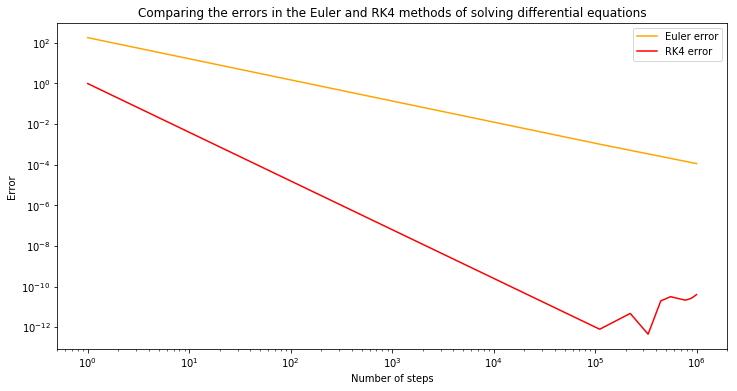

In [22]:
n0=1000 #these define arbitrary values used for comparison
t0= 0
t=20
"""This creates lists with specific values to be plotted to demonstrate error"""

n_panels= numpy.linspace(1,10**6,10,dtype=int) #this creates an array of the number of steps from 1 to 10^6
euler_list = [] #this creates an empty list for error in euler plots
RK4_list = [] #this creates an empty list for the error in Runge Kutta 4 plots

for i in range(len(n_panels)): #this iterates over the number of steps in the array n_steps
    dt= t/n_panels[i] #this calculates the value of dt
    euler_fnc = solve_euler(f_rad, n0,t0,dt,n_panels[i]) #this calculates an euler approximation using different steps
    euler_value = euler_fnc[-1] # this takes the last value in the array
    euler_list.append(euler_value) #this adds the value to the euler error plots list
    
    RK4_fnc = solve_RK4(f_rad, n0,t0,dt,n_panels[i]) #this calculates a Runge Kutta approx using different steps
    RK4_value = RK4_fnc[-1] #this takes the last value in the array
    RK4_list.append(RK4_value) #this adds the valueto the RK4 error plots

euler_error = abs(analytic(n0,t) - euler_list) #this calculates the error by comparing with the value at the same point on the analytic function
RK4_error = abs(analytic(n0,t) - RK4_list)#this does as above


"""This plots graphs comparig the error used for the different estimation techniques."""



plt.figure(figsize=(12, 6)) #this opens the figure and defines the size
plt.loglog(n_panels, euler_error, color='orange', label='Euler error') #this plots the errorin euler
plt.loglog(n_panels, RK4_error, color='red', label='RK4 error') #this plots the error in RK4
plt.legend(loc='best') #this postions a legend
plt.title('Comparing the errors in the Euler and RK4 methods of solving differential equations') #this adds a title
plt.xlabel('Number of steps') #this labels the x-axis
plt.ylabel('Error') #this labels the y-axis
plt.show #this displays the graph
